### <u><font color='green'>Step by step building of Neural Network

One hidden layer and one neuron as output layer is being used.<br/>

<u><b> Input, Output, Weight & Biases:</b></u>
 - Input matrix <b>X</b>
 - Output matrix <b>Y</b>
 - <b>wh</b> as weight matrix to the hidden layer
 - <b>bh</b> as bias matrix to the hidden layer
 - <b>wout</b> as weight matrix to the output layer
 - <b>bout</b> as bias matrix to the output layer

<img style="float: left;" src="img/NN2.png" width="700" height="700" />

So we have 4 inputs nodes, 3 nodes in hidden layers and an output layer consisting of single neuron. One batch has 3 values for x and respective Y values.<br/>

<b>Step 1: Hidden layer input</b> - sum of Dot products of input & Weights and biases. <i><font color='blue'>[H_input = (X.wh) + bh]</font></i><br/> 
 - 1st set of X is 1x4 and weight is 4x3 and bias is 1x3 which gives 1x3, similarly other two rows would be filled

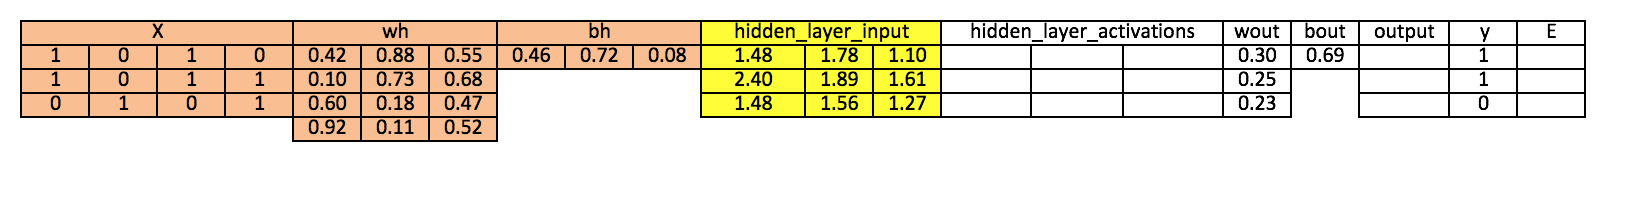

<b>Step 2: Hidden layer activations</b> - Non-linear transformation using sigmoid activation function (1/(1+exp(-x)). <i><font color='blue'>[H_act = sigmoid(H_input)]</i><br/>

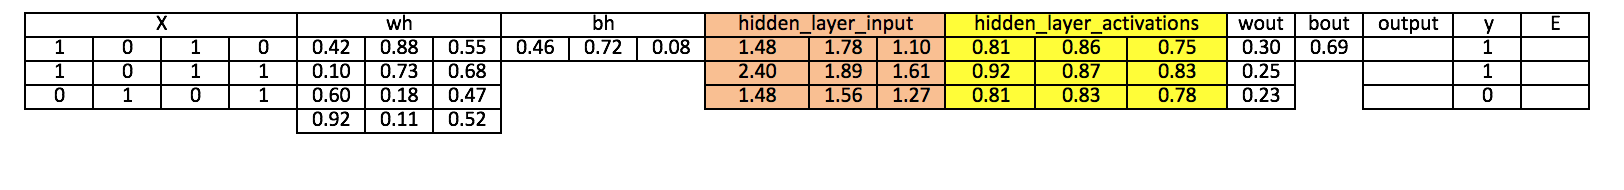

<b>Step 3: Output</b> - Apply step one and two on output, now input will be hidden layer.<br/>
 - <i><font color='blue'>Output = sigmod((H_act.wout)+bout)

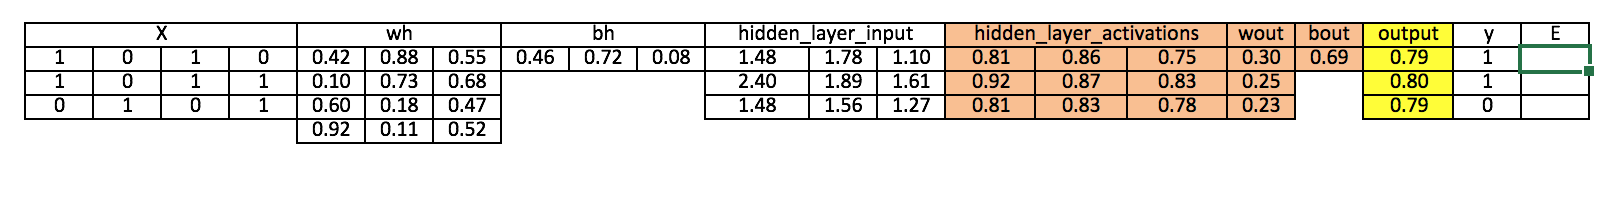

### <u> <font color='green'>Now Backward propagation

<b>Step 4: Calculate error and slope at Output and hidden layer</b> - <br/>
 - <i><font color='blue'><b>Error</b> = Y - output</font></i>
 - <b>O_Slope</b> = derivative of activations = derivatives_sigmoid(output) = <i><font color='blue'>output*(1 - output)</font>   # as derivative of sigmoid is x*(1 - x)</i>
 - <b>H_Slope</b> = derivatives_sigmoid(H_act) = <i><font color='blue'>H_act(1 - H_act)

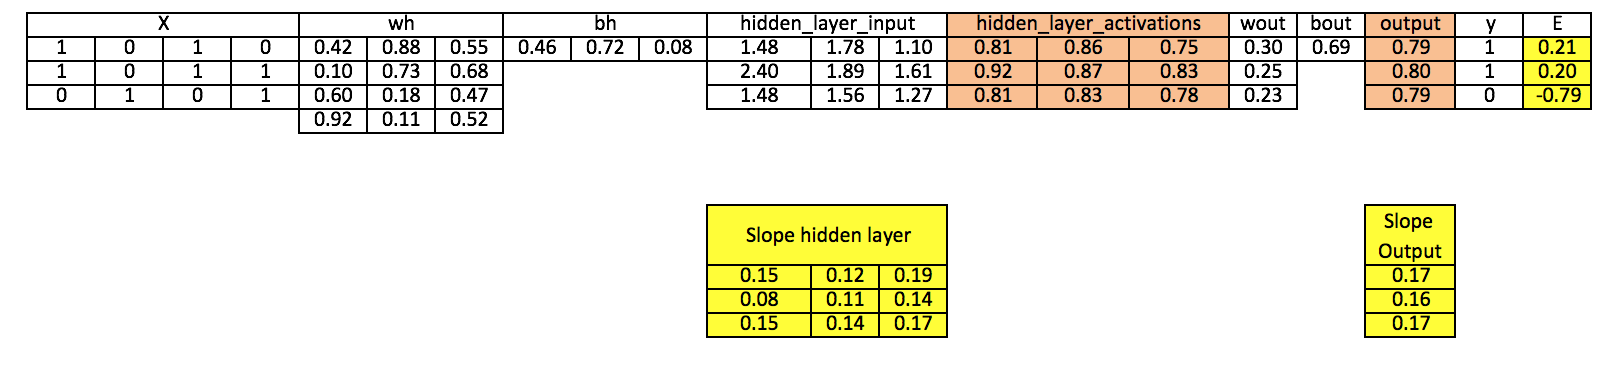

<b>Step 5: Delta at Output layer and error propagates backwards</b> - <br/>
 - <i><font color='blue'>D_out = O_Slope * Error</font></i>
 - Get error at hidden layer, which would be product of delta at output layer and weight at output layer.<font color='blue'> <i>H_Error = D_out * T(wout) </i></font>
 - Now delta at Hidden layer,<i><font color='blue'> D_hidden = H_slope * H_Error</font></i>

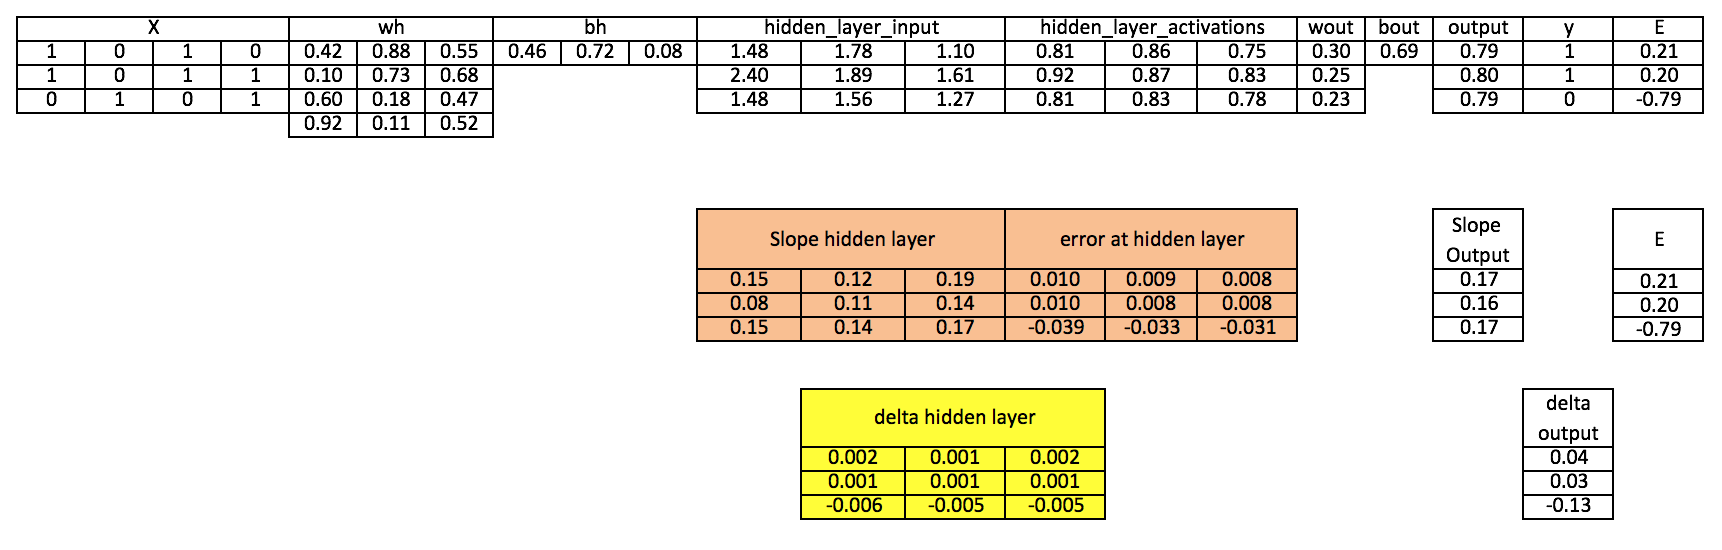

<b>Step 5: Update weights and biases</b> - <br/>
 - Weight at output_layer = wout + matrix_dot_product(hiddenlayer_activations.Transpose, d_output) * learning_rate.<font color='blue'><i> wout = wout + (T(H_act).D_out) * learning_rate</i></font>
 - weight at hidden layer =  wh + matrix_dot_product(X.Transpose,d_hidden_layer) * learning_rate. <font color='blue'><i>wh = wh + (T(X).D_hidden) * learning_rate </i></font>
 - bias at output_layer =bias at output_layer + sum of delta of output_layer at row-wise * learning_rate,<font color='blue'><i> bout = bout + sum(D_out,axis=0) * learning_rate </i></font>
 - bias at hidden_layer =bias at hidden_layer + sum of delta of hidden_layer at row-wise * learning_rate,<font color='blue'><i> bh = bh + sum(D_hidden,axis=0) * learning_rate </i></font>

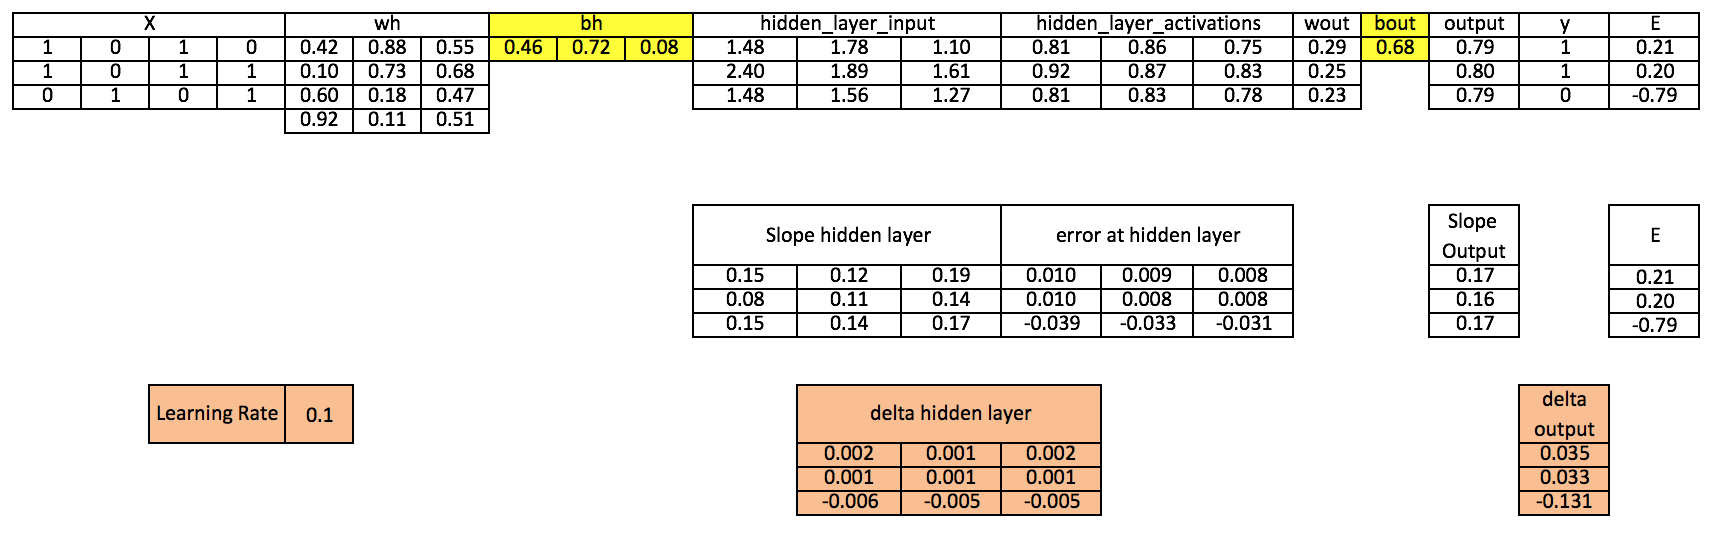

Iterate for multiple time and we can have very close output to Y

<u> <b> <font color='green'> Python Codes

In [1]:
import numpy as np

#Input & Output array
X=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])
y=np.array([[1],[1],[0]])

In [2]:
#Variable initialization
epoch=5000 #Setting training iterations
lr=0.1 # learning rate
input_nodes = X.shape[1] 
hiddenlayer_nodes = 3 
output_neurons = y.shape[1] 

#weight and bias initialization
wh=np.random.uniform(size=(input_nodes,hiddenlayer_nodes)) #weight matrix hidden layer
bh=np.random.uniform(size=(1,hiddenlayer_nodes)) #bias to hidden layer
wout=np.random.uniform(size=(hiddenlayer_nodes,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

In [3]:
#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [4]:
#Derivative of Sigmoid Function
def der_sigmoid(x):
    return x * (1 - x)

In [5]:
for i in range(epoch):

    #Forward Propogation
    H_input=np.dot(X,wh) + bh
    H_act = sigmoid(H_input)
    output = sigmoid(np.dot(H_act,wout)+bout)

    #Backpropagation
    Eroor = y-output
    O_slope = der_sigmoid(output)
    H_slope = der_sigmoid(H_act)
    D_out = O_slope * Eroor
    H_Error = D_out.dot(wout.T)
    D_hidden = H_Error * H_slope
    wout += H_act.T.dot(D_out) *lr
    bout += np.sum(D_out, axis=0,keepdims=True) *lr
    wh += X.T.dot(D_hidden) *lr
    bh += np.sum(D_hidden, axis=0,keepdims=True) *lr

In [6]:
output

array([[0.97815156],
       [0.96481545],
       [0.0491215 ]])